In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import squarify

%matplotlib inline

In [2]:
data = pd.read_csv("AppleStore.csv")

In [3]:
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
data.tail()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1
7196,11097,1188375727,Escape the Sweet Shop Series,90898432,USD,0.00,3,3,5.0,5.0,1.0,4+,Games,40,0,2,1


In [5]:
data.shape

(7197, 17)

In [6]:
data.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [7]:
data.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [8]:
data.nunique()#check unique value

Unnamed: 0          7197
id                  7197
track_name          7195
size_bytes          7107
currency               1
price                 36
rating_count_tot    3185
rating_count_ver    1138
user_rating           10
user_rating_ver       10
ver                 1590
cont_rating            4
prime_genre           23
sup_devices.num       20
ipadSc_urls.num        6
lang.num              57
vpp_lic                2
dtype: int64

In [9]:
data['prime_genre'].unique()#check specific unique value

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

In [10]:
data.isnull().sum()#check for null value

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [11]:
#convert size of apps from bytes to mb
data['size_bytes'] = data['size_bytes'] / 1000000
data.rename(columns={'size_bytes':'size_mb'}, inplace=True)
data.head(5)

,Unnamed: 0,id,track_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100.788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158.578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92.774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [12]:
#remove duplicate data
data.duplicated(subset=None, keep=False)
data.head(5)

,Unnamed: 0,id,track_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100.788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158.578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92.774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [13]:
genres = data['prime_genre'].unique()
print("Total genres : {}".format(len(genres)))
print(genres)

Total genres : 23
['Games' 'Productivity' 'Weather' 'Shopping' 'Reference' 'Finance' 'Music'
 'Utilities' 'Travel' 'Social Networking' 'Sports' 'Business'
 'Health & Fitness' 'Entertainment' 'Photo & Video' 'Navigation'
 'Education' 'Lifestyle' 'Food & Drink' 'News' 'Book' 'Medical' 'Catalogs']


In [14]:
#Check number of free apps and paid apps
freeapps = data[data.price == 0.0]
paidapps = data[data.price != 0.0]

print("Free apps: ",len(freeapps))
print("Paid apps: ",len(paidapps))

Free apps:  4056
Paid apps:  3141


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002361CB86C08>],
      dtype=object)

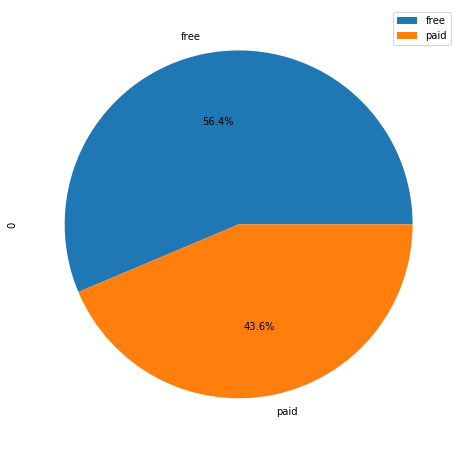

In [15]:
#Plotting pie chart for free apps and paid apps
app_pricedf= pd.DataFrame( [len(freeapps),len(paidapps)] , index=['free','paid'])
app_pricedf.plot(kind='pie', subplots=True, figsize=(16,8), autopct='%1.1f%%')

In [19]:
# Find the number of app in each genre
def genreFree(gen):
    return len(data[(data['price'] == 0.0) & (data['prime_genre']== gen)])
def genrePaid(gen):
    return len(data[(data['price'] != 0.0) & (data['prime_genre']== gen)])


In [20]:
#Make list for each genre and total apps
genre_list = list()
genreFree_list = list()
genrePaid_list = list()
genreTotal_list = list()

In [21]:
#append the detail to list
for gen in genres:  
    free_gen = genreFree(gen)
    paid_gen = genrePaid(gen)
    totalapp_gen = free_gen + paid_gen
    genre_list.append(gen)
    genreFree_list.append(free_gen)
    genrePaid_list.append(paid_gen)
    genreTotal_list.append(totalapp_gen)

In [22]:
#Create a dataframe
genre_df = pd.DataFrame({
    "genre_name" : genre_list,
    "genre_freeApp" : genreFree_list,
    "genre_paidApp" : genrePaid_list,
    "genre_totalApp" : genreTotal_list
},columns=['genre_name','genre_freeApp','genre_paidApp','genre_totalApp'])

#sort in descending order
genre_df.sort_values('genre_totalApp', ascending=False, inplace=True)

genre_df.head(10)

,genre_name,genre_freeApp,genre_paidApp,genre_totalApp
0,Games,2257,1605,3862
13,Entertainment,334,201,535
16,Education,132,321,453
14,Photo & Video,167,182,349
7,Utilities,109,139,248
12,Health & Fitness,76,104,180
1,Productivity,62,116,178
9,Social Networking,143,24,167
17,Lifestyle,94,50,144
6,Music,67,71,138


In [23]:
# remove duplicate genre 
genre_df.drop_duplicates('genre_name',keep= False,inplace=True)
genre_df.head()

,genre_name,genre_freeApp,genre_paidApp,genre_totalApp
0,Games,2257,1605,3862
13,Entertainment,334,201,535
16,Education,132,321,453
14,Photo & Video,167,182,349
7,Utilities,109,139,248


In [24]:
def groupedGraph(start,end):
    # set width of bar
    barWidth = 0.20

    # set height of bar
    bars1 = genre_df['genre_freeApp'][start:end]
    bars2 = genre_df['genre_paidApp'][start:end]
    bars3 = genre_df['genre_totalApp'][start:end]

    # Set position of bar on X axis
    r1 = np.arange(bars1.size)
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Make the plot
    plt.bar(r1, bars1, color='#36688D', width=barWidth, edgecolor='white', label='Free apps')
    plt.bar(r2, bars2, color='#F3CD05', width=barWidth, edgecolor='white', label='Paid apps')
    plt.bar(r3, bars3, color='#F49F05', width=barWidth, edgecolor='white', label='Total apps')

    # Add xticks on the middle of the group bars
    plt.xticks([r + barWidth for r in range(len(bars1))], genre_df['genre_name'][start:end])

    # Create legend & Show graphic
    plt.legend()

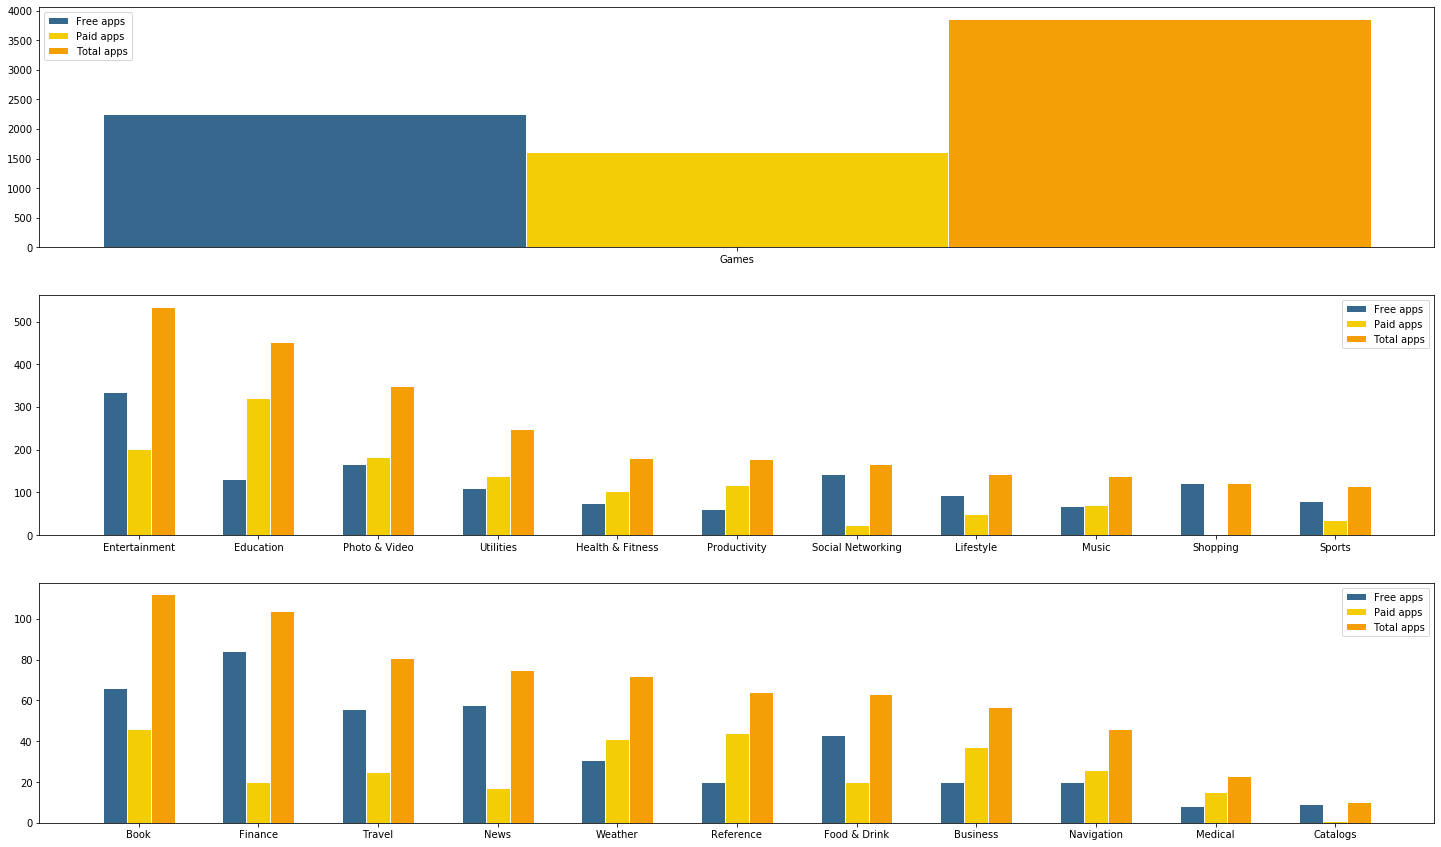

In [25]:
#Let's visualize this dataframe into the Grouped barplot

fig = plt.figure(figsize=(25,15))

plt.subplot(311)
groupedGraph(0,1)

plt.subplot(312)
groupedGraph(1,12)

plt.subplot(313)
groupedGraph(12,23)

In [28]:
#Find most popular app
popular_apps = data.sort_values(['user_rating','rating_count_tot'], ascending=False)
popular_apps.head()

,Unnamed: 0,id,track_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1104,1289,487119327,Head Soccer,121.319424,USD,0.00,481564,8518,5.0,5.0,5.4.1,4+,Games,40,4,11,1
302,341,350642635,Plants vs. Zombies,105.379840,USD,0.99,426463,680,5.0,4.0,1.9.13,9+,Games,38,0,5,1
3086,3694,930574573,Sniper 3D Assassin: Shoot to Kill Gun Game,157.851648,USD,0.00,386521,10332,5.0,5.0,1.17.6,17+,Games,40,5,9,1
2177,2537,698255242,Geometry Dash Lite,69.076992,USD,0.00,370370,2650,5.0,4.5,2.11,4+,Games,37,4,1,1
498,568,387428400,Infinity Blade,624.107810,USD,0.99,326482,177050,5.0,5.0,1.4.1,12+,Games,43,5,13,1


[Text(0, 0, 'Head Soccer'),
 Text(0, 0, 'Plants vs. Zombies'),
 Text(0, 0, 'Sniper 3D Assassin: Shoot to Kill Gun Game'),
 Text(0, 0, 'Geometry Dash Lite'),
 Text(0, 0, 'Infinity Blade'),
 Text(0, 0, 'Geometry Dash'),
 Text(0, 0, "Domino's Pizza USA"),
 Text(0, 0, 'CSR Racing 2'),
 Text(0, 0, "Pictoword: Fun 2 Pics Guess What's the Word Trivia"),
 Text(0, 0, 'Plants vs. Zombies HD'),
 Text(0, 0, 'The Room'),
 Text(0, 0, 'Iron Force'),
 Text(0, 0, 'Sniper Shooter: Gun Shooting Games'),
 Text(0, 0, 'Flashlight Ⓞ'),
 Text(0, 0, 'Pic Collage - Picture Editor & Photo Collage Maker'),
 Text(0, 0, 'Zappos: shop shoes & clothes, fast free shipping'),
 Text(0, 0, 'Credit Karma: Free Credit Scores, Reports & Alerts'),
 Text(0, 0, "PewDiePie's Tuber Simulator"),
 Text(0, 0, 'We Heart It - Fashion, wallpapers, quotes, tattoos'),
 Text(0, 0, 'Google Photos - unlimited photo and video storage')]

D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0, flags=flags)


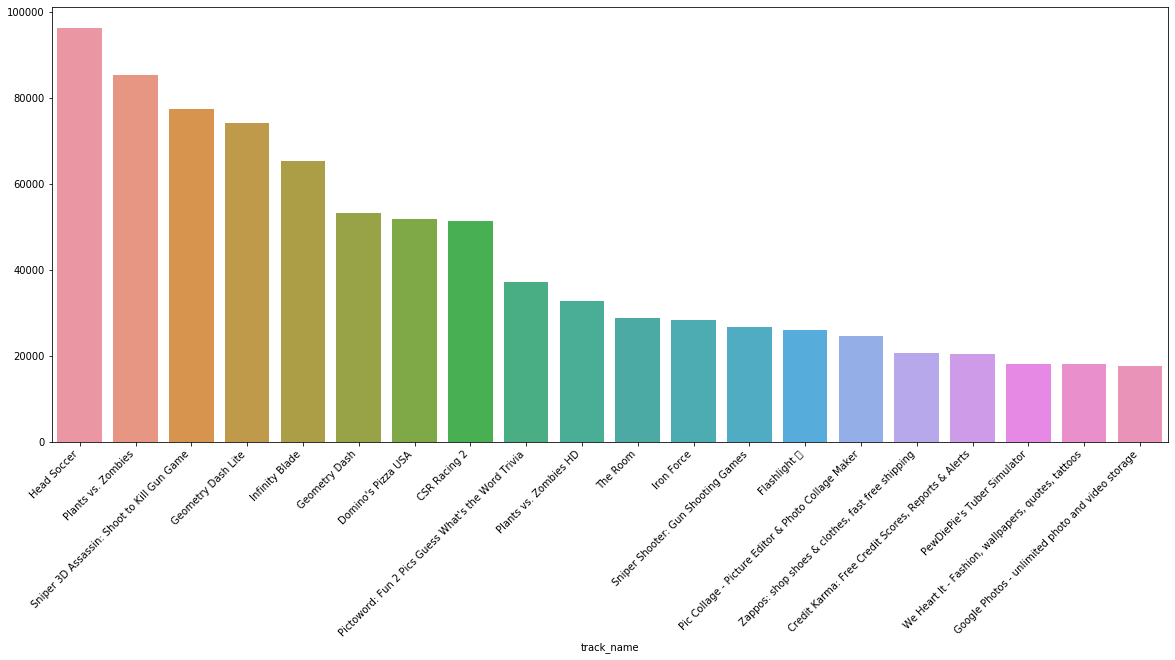

In [29]:
#Visualize top 10 higher rating applications
fig = plt.figure(figsize=(20,8))

ax = sns.barplot(popular_apps['track_name'][0:20], (popular_apps['rating_count_tot']/popular_apps['user_rating'])[0:20])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

In [30]:
# All higher rating applications 
ratingapp = popular_apps[(popular_apps['user_rating'] == 4.0) | (popular_apps['user_rating'] == 5.0) | (popular_apps['user_rating']==4.5)]
ratingapp.head(5)

,Unnamed: 0,id,track_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1104,1289,487119327,Head Soccer,121.319424,USD,0.00,481564,8518,5.0,5.0,5.4.1,4+,Games,40,4,11,1
302,341,350642635,Plants vs. Zombies,105.379840,USD,0.99,426463,680,5.0,4.0,1.9.13,9+,Games,38,0,5,1
3086,3694,930574573,Sniper 3D Assassin: Shoot to Kill Gun Game,157.851648,USD,0.00,386521,10332,5.0,5.0,1.17.6,17+,Games,40,5,9,1
2177,2537,698255242,Geometry Dash Lite,69.076992,USD,0.00,370370,2650,5.0,4.5,2.11,4+,Games,37,4,1,1
498,568,387428400,Infinity Blade,624.107810,USD,0.99,326482,177050,5.0,5.0,1.4.1,12+,Games,43,5,13,1


In [31]:
#Divide the dataframe into free_ratingapp and paid_ratingapp

#Only free higher rating applications
free_ratingapp = ratingapp[ratingapp['price'] == 0.0]

#Only paid higher rating applications
paid_ratingapp = ratingapp[ratingapp['price'] != 0.0]

print("All higher rating applications :", len(ratingapp))
print("Free higher rating applications : ",len(free_ratingapp))
print("Paid higher rating applications : ",len(paid_ratingapp))

All higher rating applications : 4781
Free higher rating applications :  2570
Paid higher rating applications :  2211


[Text(0, 0, 'Plants vs. Zombies---Games'),
 Text(0, 0, 'Infinity Blade---Games'),
 Text(0, 0, 'Geometry Dash---Games'),
 Text(0, 0, 'Plants vs. Zombies HD---Games'),
 Text(0, 0, 'The Room---Games'),
 Text(0, 0, 'HB2 PLUS---Games'),
 Text(0, 0, 'Ski Safari---Games'),
 Text(0, 0, 'The Room Two---Games'),
 Text(0, 0, 'Yoga Studio---Health & Fitness')]

D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0, flags=flags)


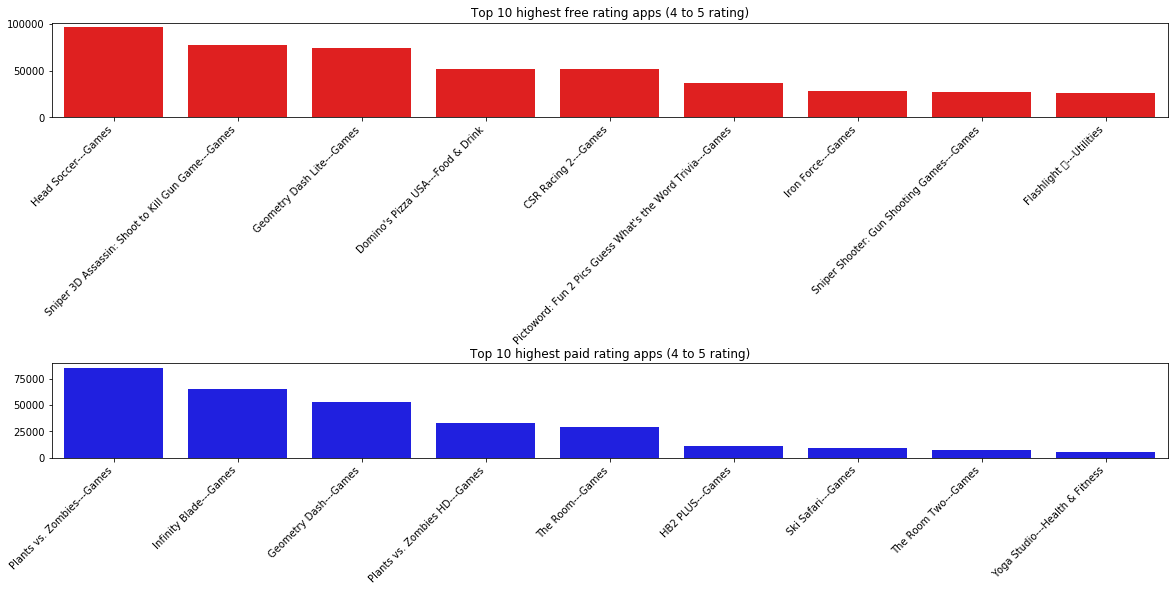

In [32]:
#Visualize free free and paid rating apps (4 to 5 rating)
fig = plt.figure(figsize=(20,8))

plt.subplot(411)
plt.title("Top 10 highest free rating apps (4 to 5 rating)")
ax = sns.barplot(free_ratingapp['track_name'][0:9] + '---' + free_ratingapp['prime_genre'][0:9],(free_ratingapp['rating_count_tot']/free_ratingapp['user_rating'])[0:9], color="red")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.subplot(414)
plt.title("Top 10 highest paid rating apps (4 to 5 rating)")
ax = sns.barplot(paid_ratingapp['track_name'][0:9] + '---' + paid_ratingapp['prime_genre'][0:9],(paid_ratingapp['rating_count_tot']/paid_ratingapp['user_rating'])[0:9], color="blue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

In [33]:
#Find most popular genres in free apps and paid apps

In [34]:
# create the empty lists for storing total highratingapps in their respective genres
free_highratingapp = list()
paid_highratingapp = list()
total_highratingapp = list()

In [35]:
#Append each genre
for g in ratingapp['prime_genre'].unique():
    free_highratingapp.append(len(free_ratingapp[free_ratingapp['prime_genre']== g]))
    paid_highratingapp.append(len(paid_ratingapp[paid_ratingapp['prime_genre']== g]))
    total_highratingapp.append(len(free_ratingapp[free_ratingapp['prime_genre']== g]) + len(paid_ratingapp[paid_ratingapp['prime_genre']== g]))

In [36]:
#Make dataframe
rating_df = pd.DataFrame({
    'genre' : genre_list,
    'free_higherRating' : free_highratingapp,
    'paid_higherRating' : paid_highratingapp,
    'total_higherRating' : total_highratingapp
},columns=['genre','free_higherRating','paid_higherRating','total_higherRating'])

rating_df.sort_values('total_higherRating',ascending =False, inplace=True)
rating_df.head()

,genre,free_higherRating,paid_higherRating,total_higherRating
0,Games,1625,1243,2868
8,Travel,76,189,265
13,Entertainment,154,107,261
3,Shopping,122,133,255
15,Navigation,53,91,144


In [37]:
#remove duplicates
rating_df.drop_duplicates('genre',keep=False,inplace=True)
rating_df.head()

,genre,free_higherRating,paid_higherRating,total_higherRating
0,Games,1625,1243,2868
8,Travel,76,189,265
13,Entertainment,154,107,261
3,Shopping,122,133,255
15,Navigation,53,91,144


Text(0.5, 1.0, 'Top 10 Paid popular applications genres')

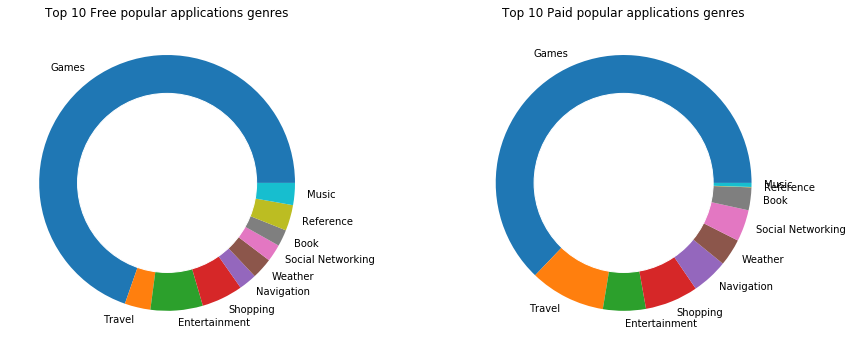

In [38]:
#Visualize circle graph
fig = plt.figure(figsize=(15,20))

plt.subplot(321)
# Create a circle for the center of the plot
circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(rating_df['free_higherRating'][0:10], labels= rating_df['genre'][0:10])
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Top 10 Free popular applications genres")

plt.subplot(322)
# Create a circle for the center of the plot
circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(rating_df['paid_higherRating'][0:10], labels= rating_df['genre'][0:10])
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Top 10 Paid popular applications genres")

In [39]:
def dountChart(gen,title):  
    # Create a circle for the center of the plot
    circle=plt.Circle( (0,0), 0.7, color='white')
    
    # just keep on user rating as name not overlapping while pie chart plotting
    plt.pie(ratingapp['user_rating'][ratingapp['prime_genre']==gen][0:10], labels= ratingapp['track_name'][ratingapp['prime_genre']==gen][0:10])
    p=plt.gcf() #gcf = get current figure
    p.gca().add_artist(circle)
    plt.title(title , fontname="arial black")

findfont: Font family ['arial black'] not found. Falling back to DejaVu Sans.
D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33735 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34903 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32593 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\ba

D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12493 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12501 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12457 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12527 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12489 missing from current font.
  font.set_text

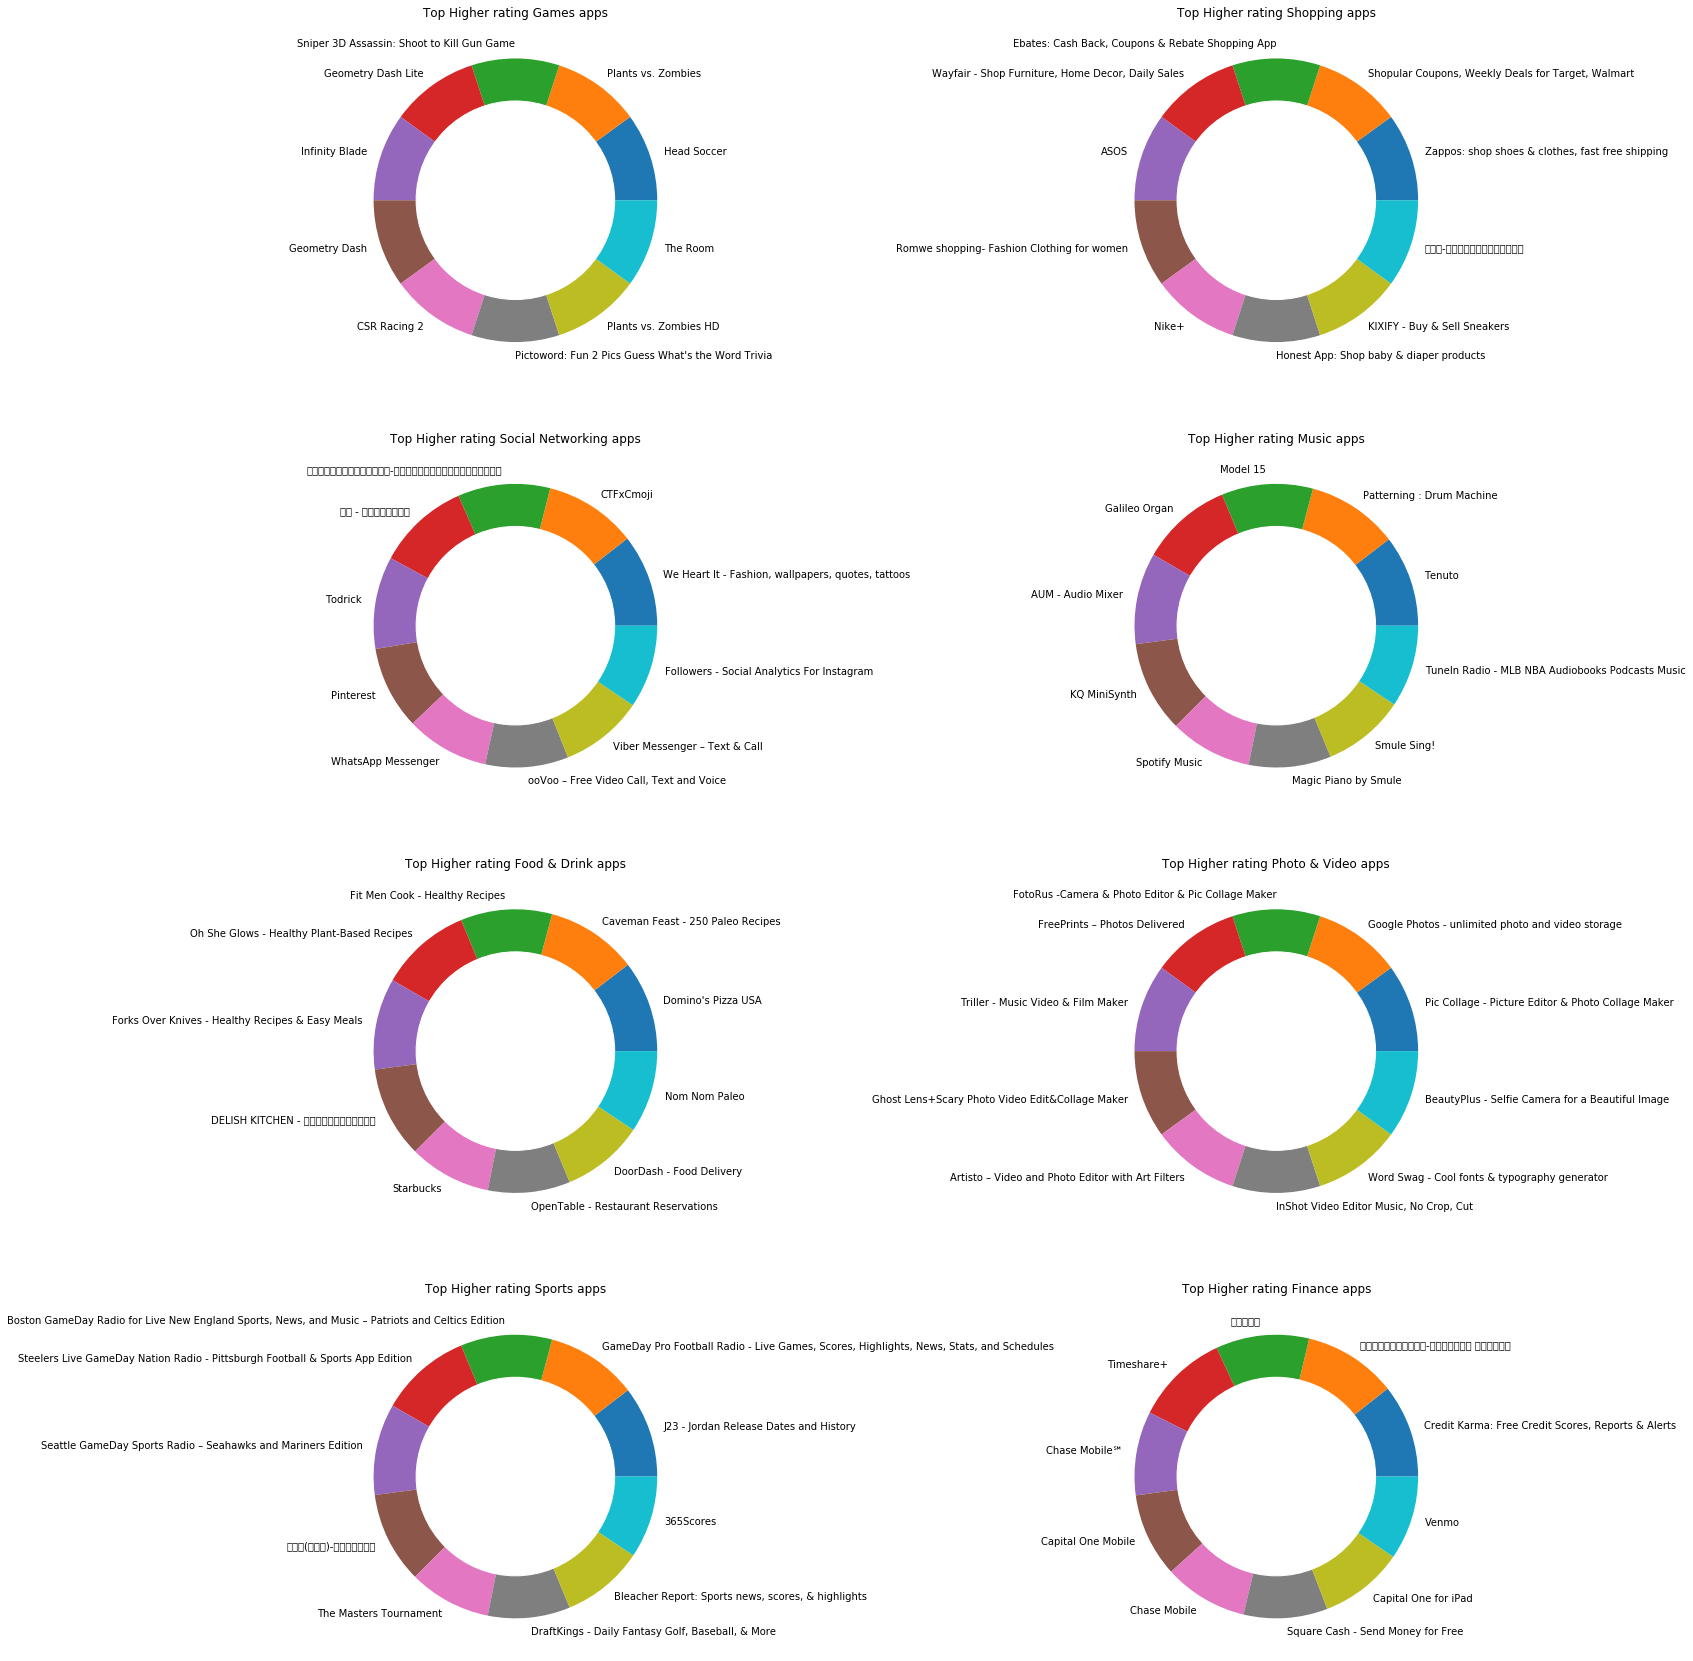

In [40]:
gens = ['Games','Shopping','Social Networking','Music','Food & Drink', 'Photo & Video','Sports','Finance']

fig = plt.figure(figsize=(25,30))

plt.subplot(421)
dountChart(gens[0],'Top Higher rating '+gens[0]+' apps')  

plt.subplot(422)
dountChart(gens[1],'Top Higher rating '+gens[1]+' apps')

plt.subplot(423)
dountChart(gens[2],'Top Higher rating '+gens[2]+' apps')

plt.subplot(424)
dountChart(gens[3],'Top Higher rating '+gens[3]+' apps')

plt.subplot(425)
dountChart(gens[4],'Top Higher rating '+gens[4]+' apps')

plt.subplot(426)
dountChart(gens[5],'Top Higher rating '+gens[5]+' apps')

plt.subplot(427)
dountChart(gens[6],'Top Higher rating '+gens[6]+' apps')

plt.subplot(428)
dountChart(gens[7],'Top Higher rating '+gens[7]+' apps')

In [41]:
#Find most higher rating apps

In [42]:
def squatifyChart(gen,title):
    squarify.plot(free_ratingapp['user_rating'][free_ratingapp['prime_genre']==gen][0:5], 
              label=free_ratingapp['track_name'][free_ratingapp['prime_genre']==gen][0:5],
              alpha=.5,
             norm_x=50)
    plt.title(title)
    plt.axis('off')

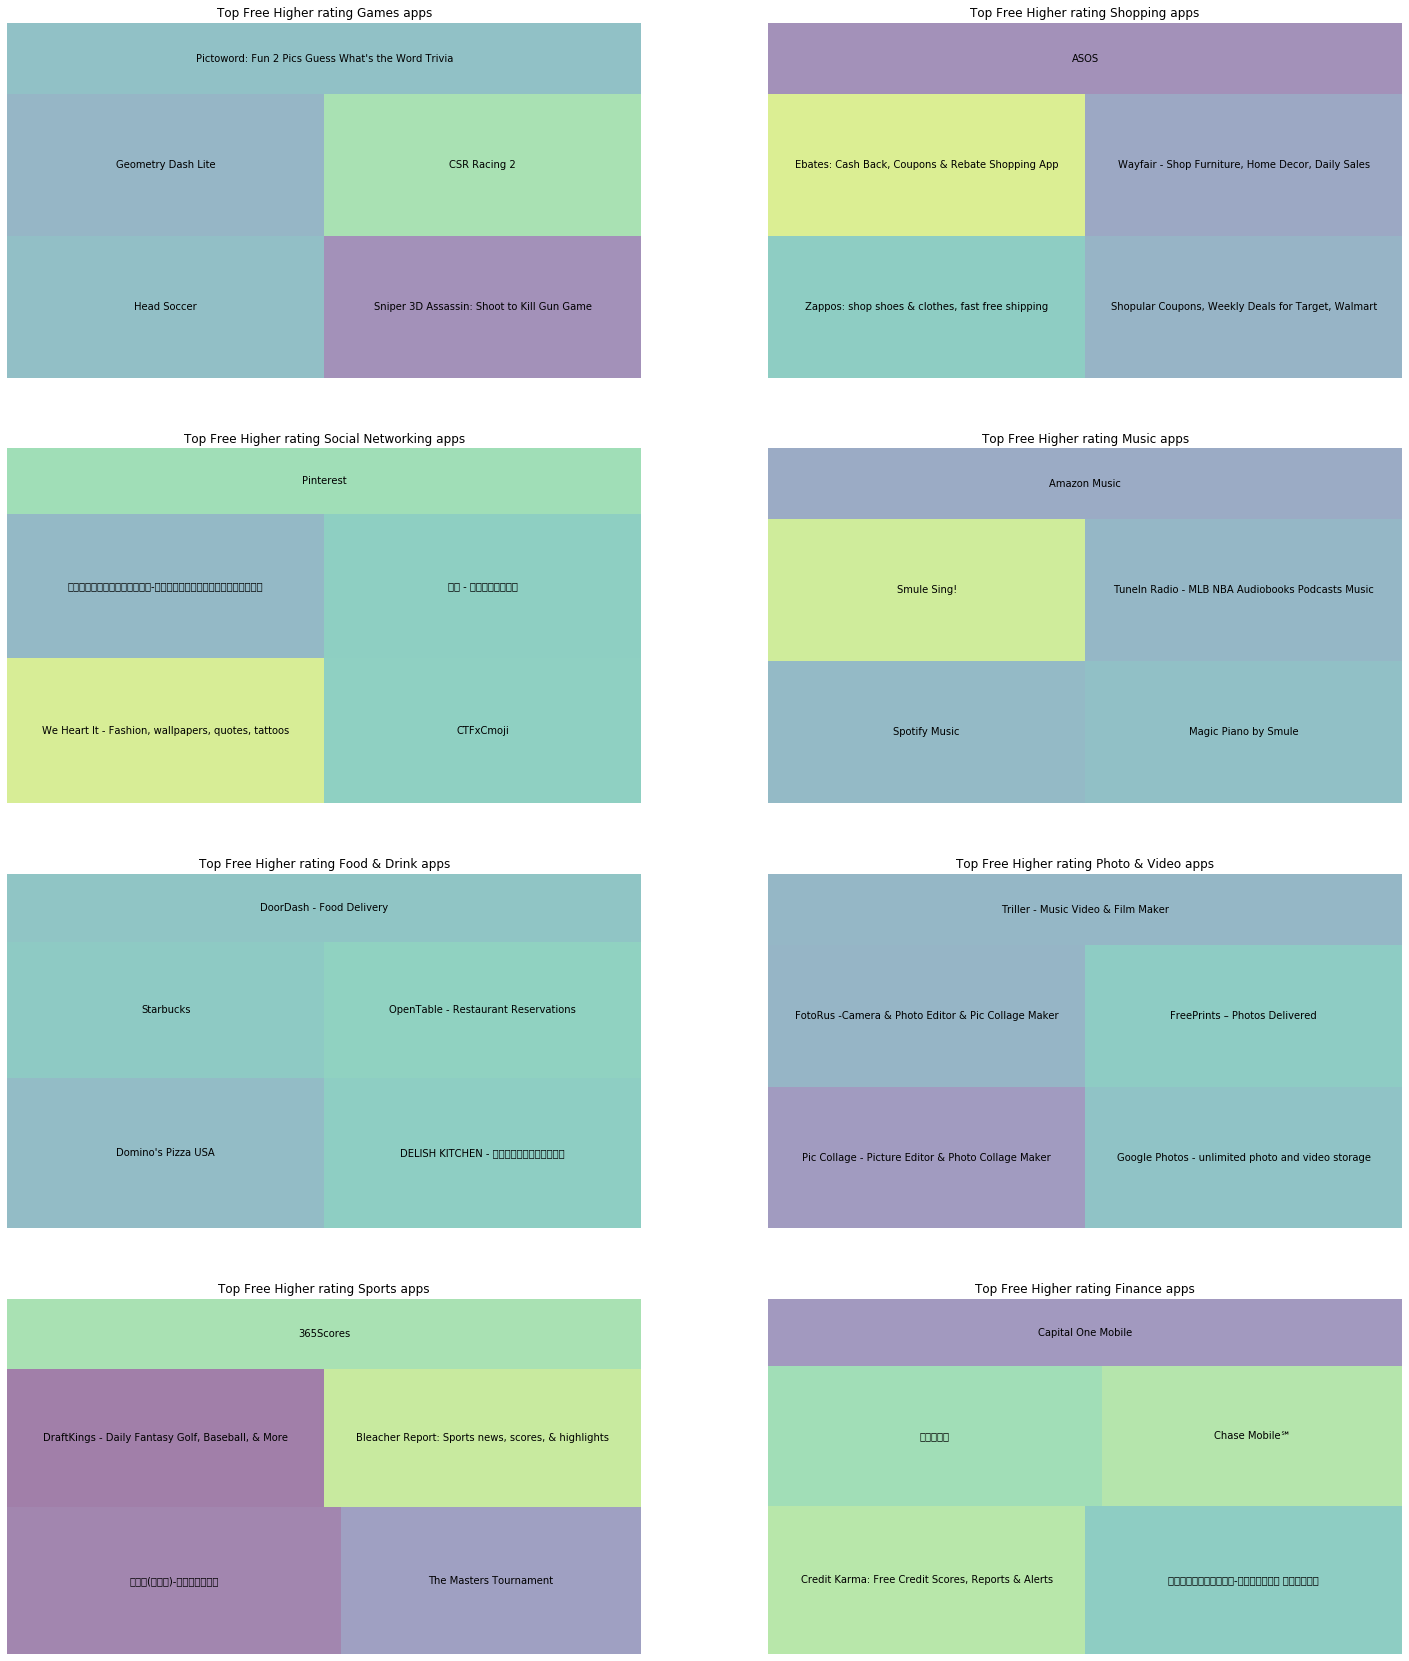

In [46]:
gens = ['Games','Shopping','Social Networking','Music','Food & Drink', 'Photo & Video','Sports','Finance']

fig = plt.figure(figsize=(25,30))

plt.subplot(421)
squatifyChart(gens[0],'Top Free Higher rating '+gens[0]+' apps')  

plt.subplot(422)
squatifyChart(gens[1],'Top Free Higher rating '+gens[1]+' apps')

plt.subplot(423)
squatifyChart(gens[2],'Top Free Higher rating '+gens[2]+' apps')

plt.subplot(424)
squatifyChart(gens[3],'Top Free Higher rating '+gens[3]+' apps')

plt.subplot(425)
squatifyChart(gens[4],'Top Free Higher rating '+gens[4]+' apps')

plt.subplot(426)
squatifyChart(gens[5],'Top Free Higher rating '+gens[5]+' apps')

plt.subplot(427)
squatifyChart(gens[6],'Top Free Higher rating '+gens[6]+' apps')

plt.subplot(428)
squatifyChart(gens[7],'Top Free Higher rating '+gens[7]+' apps')

In [47]:
#Find devices with most supported apps

In [49]:
data.sort_values(["sup_devices.num","user_rating"],ascending=False).head()

,Unnamed: 0,id,track_name,size_mb,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
605,691,403090531,Dungeon Raid,11.911065,USD,0.99,4401,2927,5.0,5.0,1.3.4,9+,Games,47,0,1,0
613,699,404553553,Bloons TD 4,23.447492,USD,2.99,8304,1401,4.5,4.5,3.6.1,4+,Games,47,0,1,1
768,877,430920838,Tikal,27.049083,USD,2.99,626,435,4.5,4.5,1.2,4+,Games,47,5,1,1
1003,1159,471458190,Reiner Knizia's Tigris & Euphrates,54.852324,USD,4.99,1777,321,4.5,4.5,2.0.1,4+,Games,47,5,1,1
1012,1176,473596157,Haunted Halloween Escape,15.481361,USD,0.00,11945,11863,4.5,4.5,1.1,12+,Games,47,5,0,1


In [50]:
#Find apps with most supported devices

In [52]:
sup_devices_apps = pd.DataFrame({
    'number_of_devices' :data["sup_devices.num"].value_counts().index,
    'total_number_of_apps' : data["sup_devices.num"].value_counts()
},columns=['number_of_devices','total_number_of_apps'])

sup_devices_apps.head()

,number_of_devices,total_number_of_apps
37,37,3263
38,38,1912
40,40,1142
43,43,371
24,24,270


In [53]:
#Find Total apps in Most Supported devices genrewise

In [56]:
def sup_device_genre(genre):
    genre_apps = data.groupby("prime_genre").get_group(genre)
    return pd.DataFrame({
              genre : genre_apps["sup_devices.num"].value_counts(),
                },columns=[genre])

In [57]:
for g in genres:
    sup_devices_apps[g] = sup_device_genre(g)
  
    
sup_devices_apps.fillna(0, inplace=True)
sup_devices_apps.sort_values('number_of_devices', ascending= False, inplace=True)
sup_devices_apps.head()

,number_of_devices,total_number_of_apps,Games,Productivity,Weather,Shopping,Reference,Finance,Music,Utilities,...,Entertainment,Photo & Video,Navigation,Education,Lifestyle,Food & Drink,News,Book,Medical,Catalogs
47,47,26,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
45,45,8,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,43,371,298.0,3.0,2.0,0.0,1.0,2.0,5.0,2.0,...,20.0,6.0,0.0,15.0,3.0,0.0,0.0,1.0,1.0,0.0
40,40,1142,910.0,4.0,5.0,1.0,5.0,4.0,2.0,16.0,...,43.0,17.0,2.0,88.0,4.0,3.0,2.0,13.0,1.0,0.0
39,39,40,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
#Find Total Free apps in Most Supported devices

In [59]:
sup_devices_free_apps = pd.DataFrame({
    'number_of_devices' :freeapps["sup_devices.num"].value_counts().index,
    'total_number_of_free_apps' : freeapps["sup_devices.num"].value_counts()
},columns=['number_of_devices','total_number_of_free_apps'])

sup_devices_free_apps.head()

,number_of_devices,total_number_of_free_apps
37,37,1976
38,38,1201
40,40,634
24,24,96
43,43,80


In [60]:
#Find Total Paid apps in Most Supported devices

In [61]:
sup_devices_paid_apps = pd.DataFrame({
    'number_of_devices' : paidapps["sup_devices.num"].value_counts().index,
    'total_number_of_paid_apps' : paidapps["sup_devices.num"].value_counts()
},columns=['number_of_devices','total_number_of_paid_apps'])

sup_devices_paid_apps.head()

,number_of_devices,total_number_of_paid_apps
37,37,1287
38,38,711
40,40,508
43,43,291
24,24,174


In [62]:
#Pearson Correlation

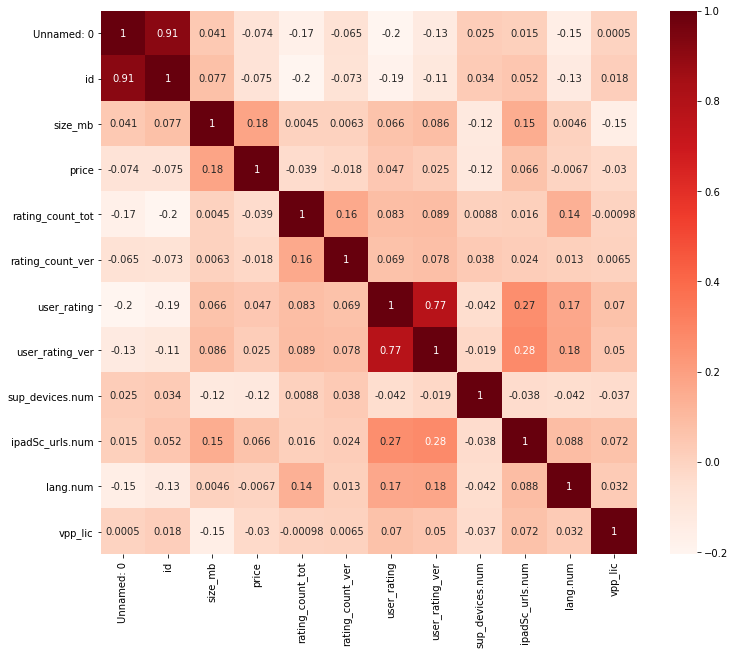

In [64]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [65]:
#Create new features

In [67]:
new_data = data

del new_data['currency']
del new_data['ver']

new_data.head()

,Unnamed: 0,id,track_name,size_mb,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100.788224,3.99,21292,26,4.0,4.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158.578688,0.00,161065,26,4.0,3.5,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,0.00,188583,2822,3.5,4.5,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,0.00,262241,649,4.0,4.5,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92.774400,0.00,985920,5320,4.5,5.0,4+,Reference,37,5,45,1


In [69]:
new_data['total_users_rating'] = new_data['rating_count_tot'] / new_data['user_rating']
new_data['total_users_rating_cur'] = new_data['rating_count_ver'] / new_data['user_rating_ver']

del new_data['rating_count_tot']
del new_data['user_rating']
del new_data['rating_count_ver']
del new_data['user_rating_ver']

new_data['total_users_rating'].fillna(0, inplace=True)
new_data['total_users_rating_cur'].fillna(0, inplace=True)

new_data['total_users_rating'] = new_data['total_users_rating'].apply(lambda x : math.ceil(x))
new_data['total_users_rating_cur'] = new_data['total_users_rating_cur'].apply(lambda x : math.ceil(x))
new_data.head()

,Unnamed: 0,id,track_name,size_mb,price,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,total_users_rating,total_users_rating_cur
0,1,281656475,PAC-MAN Premium,100.788224,3.99,4+,Games,38,5,10,1,5323,6
1,2,281796108,Evernote - stay organized,158.578688,0.00,4+,Productivity,37,5,23,1,40267,8
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,0.00,4+,Weather,37,5,3,1,53881,628
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,0.00,12+,Shopping,37,5,9,1,65561,145
4,5,282935706,Bible,92.774400,0.00,4+,Reference,37,5,45,1,219094,1064


In [71]:
#Check whether any error in support language field
len(new_data[new_data['lang.num'] == 0])

41

In [72]:
#Replace 0 to 1 as it is not possible that game has 0 language 
new_data['lang.num'].replace(0,1, inplace= True)
len(new_data[new_data['lang.num'] == 0])

0

In [74]:
#Total number of Games that are available in a multiple languages
print("Total number of apps that are available in a multiple languages : {} ".format(len(new_data[new_data['lang.num'] > 1])))
print("Number of apps that are available in only one language languages : {} ".format(len(new_data[new_data['lang.num'] == 1])))
print("Number of apps that are available in the range of 5 to 20 languages : {} ".format(len(new_data[(new_data['lang.num'] >= 5) & (new_data['lang.num'] <= 20)])))
print("Number of apps that are available in the range of 20 to 50 languages : {} ".format(len(new_data[(new_data['lang.num'] >= 20) & (new_data['lang.num'] <= 50)])))
print("Number of apps that are available in more than 50 languages : {} ".format(len(new_data[new_data['lang.num'] >= 50])))

Total number of apps that are available in a multiple languages : 3389 
Number of apps that are available in only one language languages : 3808 
Number of apps that are available in the range of 5 to 20 languages : 1966 
Number of apps that are available in the range of 20 to 50 languages : 373 
Number of apps that are available in more than 50 languages : 26 


In [75]:
#Maximum languges support application
print("Maximum languges support application : ")
new_data[['track_name','lang.num','prime_genre']][new_data['lang.num'] == max(new_data['lang.num'])]

Maximum languges support application : 


,track_name,lang.num,prime_genre
3414,Google Photos - unlimited photo and video storage,75,Photo & Video
